In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
dataset = pd.read_csv('/Users/arsheenkhatib/Desktop/ML dataset+screenshots/Default.csv', na_values='?').dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
Unnamed: 0    10000 non-null int64
default       10000 non-null object
student       10000 non-null object
balance       10000 non-null float64
income        10000 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 468.8+ KB


[[1 1 1]
 [2 2 2]
 [3 3 3]]


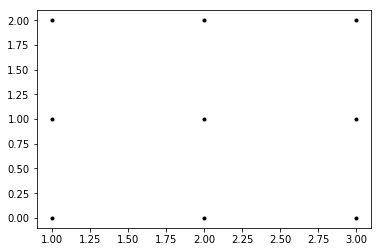

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
          balance
0      729.526495
1      817.180407
2     1073.549164
3      529.250605
4      785.655883
5      919.588530
6      825.513331
7      808.667504
8     1161.057854
9        0.000000
10       0.000000
11    1220.583753
12     237.045114
13     606.742343
14    1112.968401
15     286.232560
16       0.000000
17     527.540184
18     485.936864
19    1095.072735
20     228.952550
21     954.261793
22    1055.956605
23     641.984389
24     773.211725
25     855.008523
26     642.999739
27    1454.863272
28     615.704277
29    1119.569353
...           ...
9970  1294.500408
9971   180.620128
9972   755.432801
9973   876.119027
9974   933.332025
9975   908.315934
9976   218.417559
9977   915.439827
9978  2202.462395
9979   173.249172
9980   770.015741
9981   739.418018
9982   623.526119
9983   506.625454
9984   875.241640
9985   842.949429
9986   401.332674
9987  1092.906583
9988     0.000000
9989   999.281112
9990   372.379239


In [8]:
p_order = np.arange(1,4)
r_state = np.arange(0,3)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
print(X)
plt.plot(X, Y, marker='.', color='k', linestyle='none')
plt.show()
Z = np.zeros((p_order.size,r_state.size))
print(Z)

# Generate 3 random splits of the dataset
for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j]))
    x = dataset.iloc[:,3:4]
    print(x)
    y = dataset.default
    labelencoder_y = LabelEncoder()
    y = labelencoder_y.fit_transform(y)
 #   pred = regr.predict(X_test)
 #   Z[i,j]= mean_squared_error(y_test, pred)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                               test_size=0.5, random_state=0)                                                                 
 #regr.fit(X_train, y_train)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
Unnamed: 0    10000 non-null int64
default       10000 non-null object
student       10000 non-null object
balance       10000 non-null float64
income        10000 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 468.8+ KB


In [9]:
print(y)

[0 0 0 ..., 0 0 0]


In [10]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [11]:
lr = LinearRegression(fit_intercept=True)
train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, lr)
train_error, test_error = round(train_error, 4), round(test_error, 4)
print('train error: {} | test error: {}'.format(train_error, test_error))

train error: 0.0254 | test error: 0.0312


In [12]:
p_order = np.arange(1,11)
r_state = np.arange(0,10)

# LeaveOneOut CV
lr = LinearRegression(fit_intercept=True)
loo = LeaveOneOut()
loo.get_n_splits(dataset)
scores = list()
for i in p_order:
    poly = PolynomialFeatures(i)
    x = dataset.iloc[:,3:4]
    y = dataset.default
    labelencoder_y = LabelEncoder()
    y = labelencoder_y.fit_transform(y)
    score = cross_val_score(lr, x, y, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)

In [13]:
print(score)

-0.028270522423


In [14]:
# k-fold CV
folds = 5
elements = len(dataset.index)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

lr = LinearRegression(fit_intercept=True)

for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(X[i,j])
    x = dataset.iloc[:,3:4]
    y = dataset.default
    labelencoder_y = LabelEncoder()
    y = labelencoder_y.fit_transform(y)
    kf_5 = KFold(n_splits=folds, random_state=Y[i,j])
    Z[i,j] = cross_val_score(lr, x, y, cv=kf_5, scoring='neg_mean_squared_error').mean()

In [15]:
print(kf_5)
print(Z)

KFold(n_splits=5, random_state=9, shuffle=False)
[[-0.02825515 -0.02825515 -0.02825515 -0.02825515 -0.02825515 -0.02825515
  -0.02825515 -0.02825515 -0.02825515 -0.02825515]
 [-0.02825515 -0.02825515 -0.02825515 -0.02825515 -0.02825515 -0.02825515
  -0.02825515 -0.02825515 -0.02825515 -0.02825515]
 [-0.02825515 -0.02825515 -0.02825515 -0.02825515 -0.02825515 -0.02825515
  -0.02825515 -0.02825515 -0.02825515 -0.02825515]
 [-0.02825515 -0.02825515 -0.02825515 -0.02825515 -0.02825515 -0.02825515
  -0.02825515 -0.02825515 -0.02825515 -0.02825515]
 [-0.02825515 -0.02825515 -0.02825515 -0.02825515 -0.02825515 -0.02825515
  -0.02825515 -0.02825515 -0.02825515 -0.02825515]
 [-0.02825515 -0.02825515 -0.02825515 -0.02825515 -0.02825515 -0.02825515
  -0.02825515 -0.02825515 -0.02825515 -0.02825515]
 [-0.02825515 -0.02825515 -0.02825515 -0.02825515 -0.02825515 -0.02825515
  -0.02825515 -0.02825515 -0.02825515 -0.02825515]
 [-0.02825515 -0.02825515 -0.02825515 -0.02825515 -0.02825515 -0.02825515
  